# Modelo de Autômato Finito e Conversões: ε-AFN-AFN e AFN-AFD
---

# Sumário

1. [Conversão: ε-AFN-AFN](#eAFN-AFN)
2. [Modelo em JSON](#automato-json)



# Conversão: ε-AFN-AFN <a id="eAFN-AFN"></a>


# Modelo em JSON <a id="automato-json"></a>

- Modelo ilustrado:

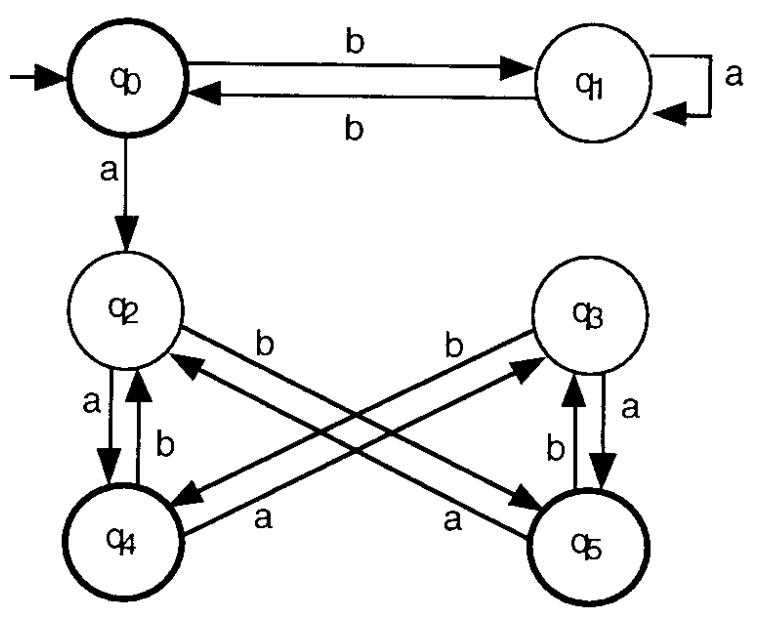

  
- Modelo em formato **JSON**:
```json
{
  "estados": ["q0", "q1", "q2", "q3", "q4", "q5"],
  "alfabeto": ["a", "b"],
  "estado_inicial": "q0",
  "estados_finais": ["q0", "q4", "q5"],
  "transicoes": {
    "q0": {"a": "q2", "b": "q1"},
    "q1": {"a": "q2", "b": "q0"},
    "q2": {"a": "qf", "b": "qf"},
    "q3": {"a": "qf", "b": "qf"},
    "q4": {"a": "qf", "b": "qf"},
    "q5": {"a": "qf", "b": "qf"},
  }
}
```

In [1]:
import json

automato = {
  "estados": ["q0", "q1", "q2", "q3", "q4", "q5", "qf"],
  "alfabeto": ["a", "b"],
  "estado_inicial": "q0",
  "estados_finais": ["q0", "q4", "q5"],
  "transicoes": {
    "q0": {"a": "q2", "b": "q1"},
    "q1": {"a": "q2", "b": "q0"},
    "q2": {"a": "qf", "b": "qf"},
    "q3": {"a": "qf", "b": "qf"},
    "q4": {"a": "qf", "b": "qf"},
    "q5": {"a": "qf", "b": "qf"},
    "qf": {"a": "qf", "b": "qf"}
  }
}

def minimizar_afd(automato):
    estados, alfabeto, trans, finais = (
        automato["estados"],
        automato["alfabeto"],
        automato["transicoes"],
        set(automato["estados_finais"])
    )

    particoes = [finais, set(estados) - finais]
    mudou = True
    while mudou:
        mudou, novas = False, []
        for grupo in particoes:
            reps = {}
            for e in grupo:
                assinatura = tuple(
                    next((i for i, p in enumerate(particoes) if trans.get(e, {}).get(s) in p), None)
                    for s in alfabeto
                )
                reps.setdefault(assinatura, set()).add(e)
            novas.extend(reps.values())
            mudou |= len(reps) > 1
        particoes = novas

    mapa = {e: "_".join(sorted(g)) for g in particoes for e in g}
    novos_estados = sorted(set(mapa.values()))
    novo_inicial = mapa[automato["estado_inicial"]]
    novos_finais = sorted({mapa[e] for e in finais})

    novas_trans = {
        mapa[next(iter(g))]: {
            s: mapa[trans[next(iter(g))][s]]
            for s in alfabeto if trans.get(next(iter(g)), {}).get(s)
        } for g in particoes
    }

    return {
        "estados": novos_estados,
        "alfabeto": alfabeto,
        "estado_inicial": novo_inicial,
        "estados_finais": novos_finais,
        "transicoes": novas_trans
    }

print(json.dumps(minimizar_afd(automato), indent=2, ensure_ascii=False))


{
  "estados": [
    "q0",
    "q1",
    "q2_q3_qf",
    "q4_q5"
  ],
  "alfabeto": [
    "a",
    "b"
  ],
  "estado_inicial": "q0",
  "estados_finais": [
    "q0",
    "q4_q5"
  ],
  "transicoes": {
    "q4_q5": {
      "a": "q2_q3_qf",
      "b": "q2_q3_qf"
    },
    "q0": {
      "a": "q2_q3_qf",
      "b": "q1"
    },
    "q1": {
      "a": "q2_q3_qf",
      "b": "q0"
    },
    "q2_q3_qf": {
      "a": "q2_q3_qf",
      "b": "q2_q3_qf"
    }
  }
}


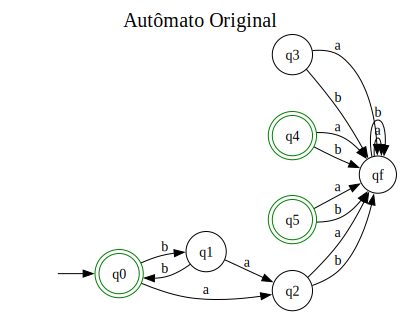

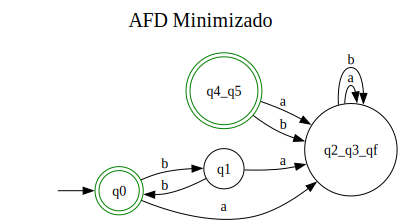

In [8]:
import sys
from pathlib import Path
sys.path.append(str(Path("../src/").resolve()))
from desenhar_automatos import desenhar_afd



def minimizar_afd(afd):
    estados, alfabeto, trans, finais = afd["estados"], afd["alfabeto"], afd["transicoes"], set(afd["estados_finais"])
    particoes = [finais, set(estados) - finais]

    mudou = True
    while mudou:
        mudou, novas = False, []
        for grupo in particoes:
            reps = {}
            for e in grupo:
                assinatura = tuple(next((i for i, p in enumerate(particoes) if trans.get(e, {}).get(s) in p), None) for s in alfabeto)
                reps.setdefault(assinatura, set()).add(e)
            novas.extend(reps.values())
            mudou |= len(reps) > 1
        particoes = novas

    mapa = {e: "_".join(sorted(g)) for g in particoes for e in g}
    novos_estados = sorted(set(mapa.values()))
    novo_inicial = mapa[afd["estado_inicial"]]
    novos_finais = sorted({mapa[e] for e in finais})

    novas_trans = {mapa[next(iter(g))]: {s: mapa[trans[next(iter(g))][s]] for s in alfabeto if trans.get(next(iter(g)), {}).get(s)} for g in particoes}

    return {"estados": novos_estados, "alfabeto": alfabeto, "estado_inicial": novo_inicial, "estados_finais": novos_finais, "transicoes": novas_trans}


automato = {
    "estados": ["q0","q1","q2","q3","q4","q5","qf"],
    "alfabeto": ["a","b"],
    "estado_inicial": "q0",
    "estados_finais": ["q0","q4","q5"],
    "transicoes": {
        "q0":{"a":"q2","b":"q1"}, "q1":{"a":"q2","b":"q0"}, "q2":{"a":"qf","b":"qf"},
        "q3":{"a":"qf","b":"qf"}, "q4":{"a":"qf","b":"qf"}, "q5":{"a":"qf","b":"qf"}, "qf":{"a":"qf","b":"qf"}
    }
}

afd_minimo = minimizar_afd(automato)

display(desenhar_afd(automato, "Autômato Original"))
display(desenhar_afd(afd_minimo, "AFD Minimizado"))
